In [1]:
#Latihan 11

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im1 = Image.open("Original.jpg").resize((255,255))
im2 = Image.open("alam2.jpg").resize((255,255))
arr1 = np.array(im1.copy())
arr2 = np.array(im2.copy())
arr3 = np.array(im2.copy())

In [3]:
keys = np.arange(256)
hist1R = np.zeros((256),dtype= np.uint32)
hist1G = np.zeros((256),dtype= np.uint32)
hist1B = np.zeros((256),dtype= np.uint32)

In [4]:
hist2R = np.zeros((256),dtype= np.uint32)
hist2G = np.zeros((256),dtype= np.uint32)
hist2B = np.zeros((256),dtype= np.uint32)

In [5]:
hist3R = np.zeros((256),dtype= np.uint32)
hist3G = np.zeros((256),dtype= np.uint32)
hist3B = np.zeros((256),dtype= np.uint32)

In [6]:
for y in range(arr1.shape[0]):
    for x in range(arr1.shape[1]):
        hist1R[arr1[y,x,0]] = hist1R[arr1[y,x,0]]+1;
        hist1G[arr1[y,x,1]] = hist1R[arr1[y,x,1]]+1;
        hist1B[arr1[y,x,2]] = hist1R[arr1[y,x,2]]+1;
        
        hist2R[arr2[y,x,0]] = hist2R[arr2[y,x,0]]+1;
        hist2G[arr2[y,x,1]] = hist2G[arr2[y,x,1]]+1;
        hist2B[arr2[y,x,2]] = hist2B[arr2[y,x,2]]+1;

In [7]:
cdf1R = hist1R.cumsum()
cdf1R_norm = cdf1R * float(hist1R.max()) / cdf1R.max()

In [8]:
cdf1G = hist1G.cumsum()
cdf1G_norm = cdf1G * float(hist1G.max()) / cdf1G.max()

In [9]:
cdf1B = hist1B.cumsum()
cdf1B_norm = cdf1B * float(hist1B.max()) / cdf1B.max()

In [10]:
cdf2R = hist2R.cumsum()
cdf2R_norm = cdf2R * float(hist2R.max()) / cdf2R.max()

In [11]:
cdf2G = hist2G.cumsum()
cdf2G_norm = cdf2G * float(hist2G.max()) / cdf2G.max()

In [12]:
cdf2B = hist2B.cumsum()
cdf2B_norm = cdf2B * float(hist2B.max()) / cdf2B.max()

In [13]:
lutR = np.zeros((256),dtype=np.uint32)
lutG = np.zeros((256),dtype=np.uint32)
lutB = np.zeros((256),dtype=np.uint32)

In [14]:
gjR = 0
gjG = 0
gjB = 0

In [15]:
for giR in range(255):
    while(gjR<255 and cdf2R[gjR+1] < cdf1R[giR+1]):
        gjR = gjR+1
    lutR[giR+1] = gjR

In [16]:
for giG in range(255):
    while(gjG<255 and cdf2G[gjG+1] < cdf1G[giG+1]):
        gjG = gjG+1
    lutG[giG+1] = gjG

In [17]:
for giB in range(255):
    while(gjB<255 and cdf2B[gjB+1] < cdf1B[giB+1]):
        gjB = gjB+1
    lutB[giB+1] = gjB

In [18]:
for y in range(arr1.shape[0]):
    for x in range(arr1.shape[1]):
        tmpR = lutR[arr1[y,x,0]]
        tmpG = lutG[arr1[y,x,0]]
        tmpB = lutB[arr1[y,x,0]]
        arr3[y,x] = [tmpR,tmpG,tmpB]
        hist3R[tmpR] = hist3R[tmpR]+1
        hist3G[tmpG] = hist3G[tmpG]+1
        hist3B[tmpB] = hist3B[tmpB]+1

In [19]:
cdf3R = hist3R.cumsum()
cdf3R_norm = cdf3R * float(hist3R.max()) / cdf3R.max()

In [20]:
cdf3G = hist3G.cumsum()
cdf3G_norm = cdf3G * float(hist3G.max()) / cdf3G.max()

In [21]:
cdf3B = hist3B.cumsum()
cdf3B_norm = cdf3B * float(hist3B.max()) / cdf3B.max()

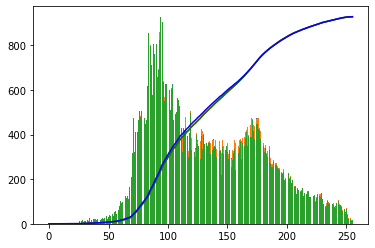

In [22]:
fig = plt.figure(1)
plt.bar(keys,hist1R)
plt.bar(keys,hist1G)
plt.bar(keys,hist1B)
plt.plot(cdf1R_norm, color = 'r')
plt.plot(cdf1G_norm, color = 'g')
plt.plot(cdf1B_norm, color = 'b')
fig.canvas.draw()
data1 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data1 = data1.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImage1 = Image.fromarray(data1).resize((255,255))
histNp1 = np.array(histImage1)

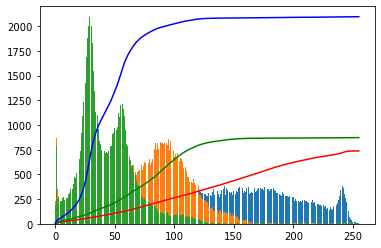

In [23]:
fig = plt.figure(2)
plt.bar(keys,hist2R)
plt.bar(keys,hist2G)
plt.bar(keys,hist2B)
plt.plot(cdf2R_norm, color = 'r')
plt.plot(cdf2G_norm, color = 'g')
plt.plot(cdf2B_norm, color = 'b')
fig.canvas.draw()
data2 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data2 = data2.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImage2 = Image.fromarray(data2).resize((255,255))
histNp2 = np.array(histImage2)

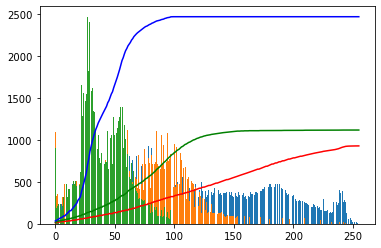

In [24]:
fig = plt.figure(3)
plt.bar(keys,hist3R)
plt.bar(keys,hist3G)
plt.bar(keys,hist3B)
plt.plot(cdf3R_norm, color = 'r')
plt.plot(cdf3G_norm, color = 'g')
plt.plot(cdf3B_norm, color = 'b')
fig.canvas.draw()
data3 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data3 = data3.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImage3 = Image.fromarray(data3).resize((255,255))
histNp3 = np.array(histImage3)

In [25]:
Image.fromarray(np.hstack((np.vstack((histNp1,arr1)),np.vstack((histNp2,arr2)),np.vstack((histNp3,arr3))))).show()